# Introduction

This notebook is a part of my IBM Machine Learning Professional Certificate. 

In this notebook I will perform unsupervised machine learning algorithms as part of my IBM Machine Learning Professional Certificate: Specialized Models Time Series and Survival Analysis. 

_"One of the main objectives of this course is to help you gain hands-on experience in communicating insightful and impactful findings to stakeholders. In this project you will use the tools and techniques you learned throughout this course to train a few unsupervised machine learning algorithms on a data set that you feel passionate about, and communicate insights you found from your modeling exercise."_

# About Dataset

The dataset I want to analyze comes from [Kaggle](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python)

**Content:** "You are owing a supermarket mall and through membership cards , you have some basic data about your customers like **Customer ID, age, gender, annual income and spending score.**"

Spending Score is something you assign to the customer based on your defined parameters like customer behavior and purchasing data. 

**Problem statement:** 

The goal for this analysis will be perform some EDA to check what kind of data I work on and a second goal is performing customer segmentation based on this data which will allowed a merketing team preper suited strategy plan for those customers. 

# Importing Needed packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import LabelBinarizer, MinMaxScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN, MeanShift, estimate_bandwidth
from scipy.cluster import hierarchy

# Load the Data

In [3]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Understanding the Data

In [4]:
print('Data contains {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

Data contains 200 rows and 5 columns.


In [5]:
# checking data types
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [6]:
# describing data
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [7]:
# checking for missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [8]:
# I decided to drop Customer ID column because it represent unique value for each customer
#and won't bring any valuable information
df.drop('CustomerID', axis=1, inplace=True)

In [9]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15,39
1,Male,21,15,81
2,Female,20,16,6
3,Female,23,16,77
4,Female,31,17,40


In [10]:
df.shape

(200, 4)

# Exploratory Data Analysis

1. First, let's look at distribution of Age and Annual Income

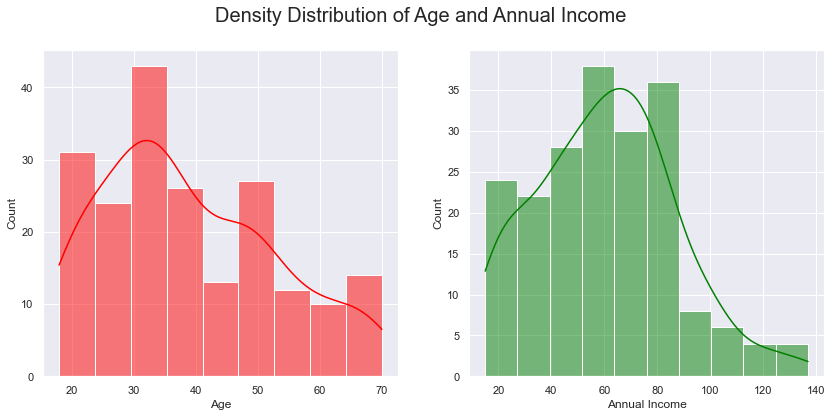

In [11]:
sns.set_context('notebook')
sns.set_style('darkgrid')

plt.figure(figsize=(14,6))
plt.suptitle('Density Distribution of Age and Annual Income', size=20)

# create first histplot
plt.subplot(1,2,1)
sns.histplot(df['Age'], kde=True, color='red')

# create second histplot
plt.subplot(1,2,2)
sns.histplot(df['Annual Income (k$)'], kde=True, color='green')
plt.xlabel('Annual Income')
plt.savefig('density_age_income.png')

**Summary:**

* the most frequent group in relation to Age Distribution lies in range 30-35 ages
* senior citizens are the least frequent visitors in Mall
* the youngest age group customers between 20-25 years are fewer frequent occurred than Middle Aged Customers Group


* most of people have annual income in range between 50-80 dollars
* there are fewer people who have annual income above 100 dollars
* the least Annual Income lies at range 20 dollars

2. Now, let's look at Gender Proportion in our dataset

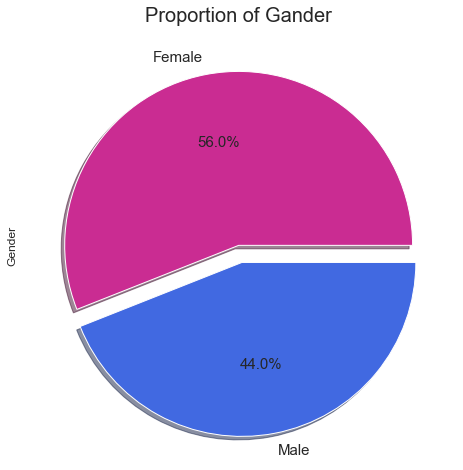

In [12]:
colors = ['#ca2c92', '#4169e1']
explode = (0, 0.1)
plt.figure(figsize=(14,8))
ax = (df['Gender'].value_counts()*100.0 / len(df))\
.plot.pie(autopct='%.1f%%', labels=['Female', 'Male'], fontsize=15, colors=colors, explode=explode, shadow=True)
plt.title('Proportion of Gander', fontsize=20)
plt.savefig('gender_prop.png')

Above pie chart explain distribution of gender in dataset. As we can see the female lead and got 56% share in gender proportion. It could be a prove of hypothesis that the womens more often are shopping and visit shopping centres. 

3. Distribution in more details

I would like to visualize in more details and use `sns.countplot` function to show distribution of Age, Annual Income and Spending Score

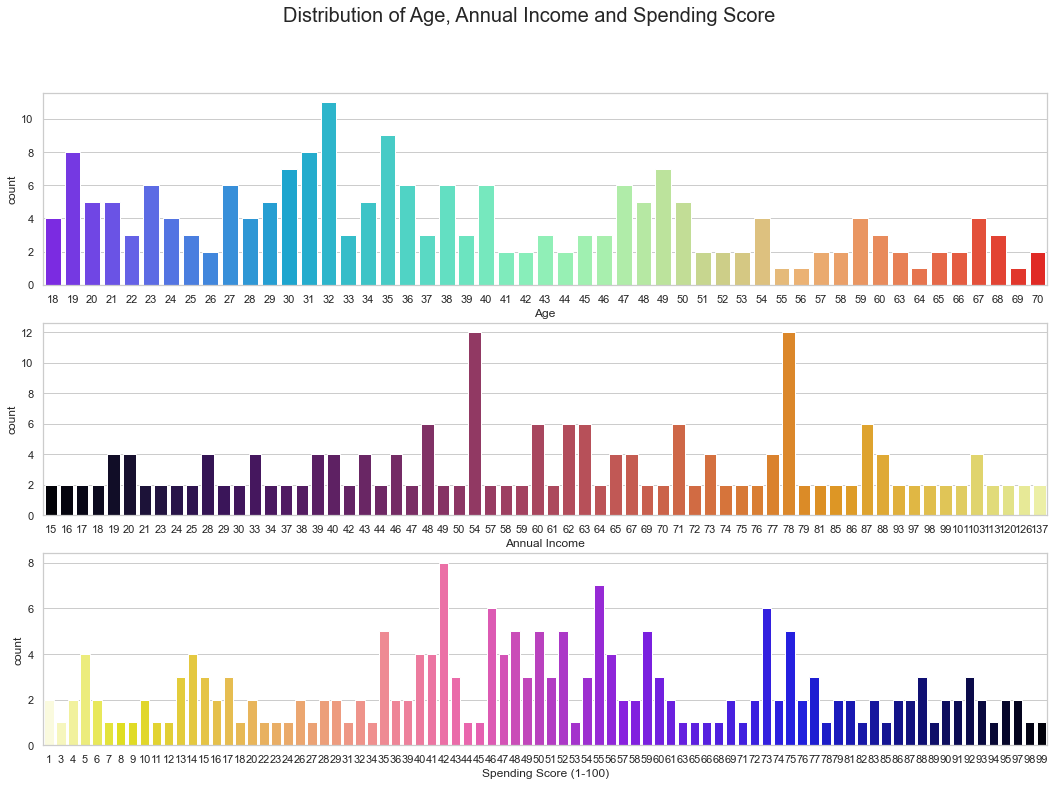

In [13]:
sns.set_style('whitegrid')

plt.figure(figsize=(18,12))
plt.suptitle('Distribution of Age, Annual Income and Spending Score', size=20)

plt.subplot(311)
sns.countplot(df['Age'], palette='rainbow')

plt.subplot(312)
sns.countplot(df['Annual Income (k$)'], palette='inferno')
plt.xlabel('Annual Income')

plt.subplot(313)
sns.countplot(df['Spending Score (1-100)'], palette='gnuplot2_r')
plt.savefig('distribution_all.png')

By looking at the above graph:

* Visitors in the Mall are in range 18 - 70 yeras. The most frequent group in age range lies between 27 - 38 yeras. People at 32 yeras are the most frequent group at the Mall. Customers in olders age range start from 55+ are less frequent than others group. For age 55, 56, 64 and 69 we observed the smallest frequent values. 
<br><br>
* Again, at Annual Income distribution we can see in more details how income range looks like. The dataset contains imaginary informations about annual income. The ranges lies between 15 - 137 dollars. 54 and 78 are the most frequent values.
<br><br>
* Spending Score distribution chart is very important. By looking at it we can get some intuition about spending score for customers who visited the Mall. On general I can conclude the the most results lies in range between 35 - 60. The range for this distribution in wide from 1 to 99, so conclude that there are a variety of customers who visited shopping centres and had different requirments.

4. As a `Gender` column is an object I would like to perform `LabelBinarizer` and transform it to binary values. 

In [14]:
# create object for label binarizer
lb = LabelBinarizer()

# change column Gender in df
df['Gender'] = lb.fit_transform(df['Gender'])

5. Correlation matrix and heatmap visualization

Before I will create correlation table and heatmap showing this correlation, I will change data types from int to float. 

In [15]:
# convert to floats
for col in df.columns:
    df[col] = df[col].astype(np.float)

In [16]:
df.dtypes

Gender                    float64
Age                       float64
Annual Income (k$)        float64
Spending Score (1-100)    float64
dtype: object

In [17]:
# create correlation matrix
corr = df.corr()
corr

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,1.000000,0.060867,0.056410,-0.058109
Age,0.060867,1.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,1.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,1.000000


In [18]:
# strip out the diagonal values for the next step
for x in range(len(df.columns)):
    corr.iloc[x,x] = 0.0
corr

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Gender,0.000000,0.060867,0.056410,-0.058109
Age,0.060867,0.000000,-0.012398,-0.327227
Annual Income (k$),0.056410,-0.012398,0.000000,0.009903
Spending Score (1-100),-0.058109,-0.327227,0.009903,0.000000


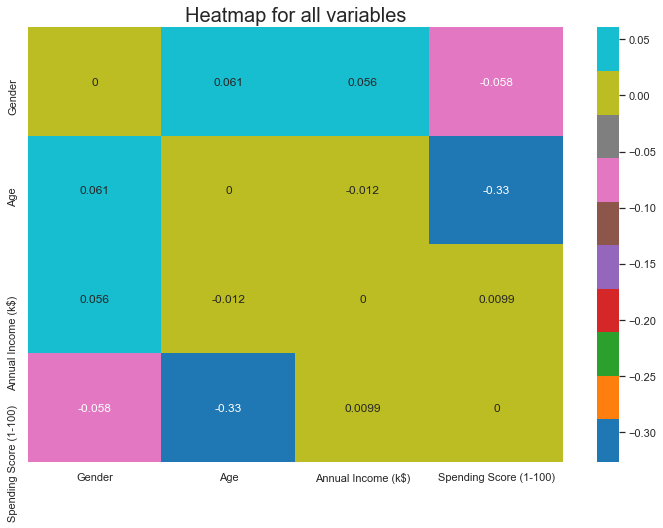

In [19]:
# create heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap='tab10')
plt.title('Heatmap for all variables', size=20)
plt.savefig('heatmap.png')

In [20]:
# pairwise maximal correlations
corr.abs().idxmax()

Gender                                       Age
Age                       Spending Score (1-100)
Annual Income (k$)                        Gender
Spending Score (1-100)                       Age
dtype: object

**Summary:**

* heatmap in readable way shows us how variables are correlated each to other <br>
* the highest correlation is between Age and Spending Score and it is a negative correlation equal to -0.33<br>
* the positive correlation occurs between Gender and Annual Income, Age and Gender and Annual Income and Spending Score

6. Checking for skew in dataset and feature scaling

In [21]:
df.skew()

Gender                    0.243578
Age                       0.485569
Annual Income (k$)        0.321843
Spending Score (1-100)   -0.047220
dtype: float64

If taking a limit for skewed columns as 0.75, it seems that our variables aren't skewed, so any log transformation won't needed. 

Perform feature scaling

In [22]:
# create MinMaxScaler object and fit to data
float_col = ['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']
mm = MinMaxScaler()
df[float_col] = mm.fit_transform(df[float_col])

In [23]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Gender,200.0,0.440000,0.497633,0.0,0.000000,0.000000,1.000000,1.0
Age,200.0,0.400962,0.268635,0.0,0.206731,0.346154,0.596154,1.0
Annual Income (k$),200.0,0.373443,0.215285,0.0,0.217213,0.381148,0.516393,1.0
Spending Score (1-100),200.0,0.502041,0.263505,0.0,0.344388,0.500000,0.734694,1.0


7. Pairplot of the transformed and scaled features

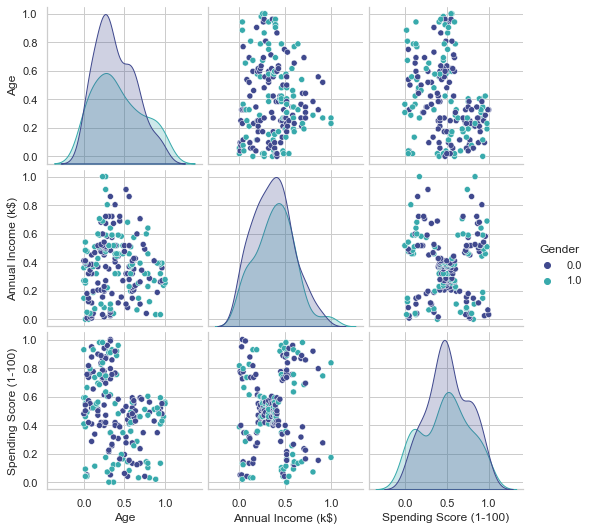

In [24]:
sns.set_context('notebook')
sns.pairplot(data=df,
            hue='Gender',
            palette='mako')
plt.savefig('pairplot.png')

8. More detailed visualization about correlated variables

**Gender vs. Spending Score**

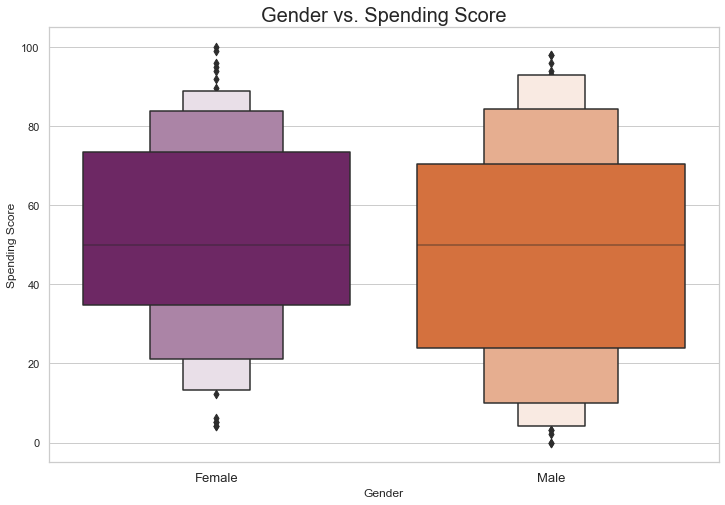

In [25]:
plt.figure(figsize=(12,8))
ax = sns.boxenplot(df['Gender'], df['Spending Score (1-100)'], palette='inferno')
ax.set_xticklabels(['Female', 'Male'], size=13)
ax.set_ylabel('Spending Score')
ax.set_yticklabels(['0', '0', '20', '40', '60', '80', '100'])
plt.title('Gender vs. Spending Score', size=20)
plt.savefig('gender_score.png')

The range for Q1 and Q3 for Male are wider than for Female. Mostly, 50% of data for Male lies in range between 25 - 70 spending score. For Female this range is a little bit tigher: 38 - 75 spending score. The median for both is at the very similar level. More Male are getting lower spening scores than Female and more Female are in higher level of spending score, which could conclude then in general Female are better shopper. 

**Gender vs. Annual Income**

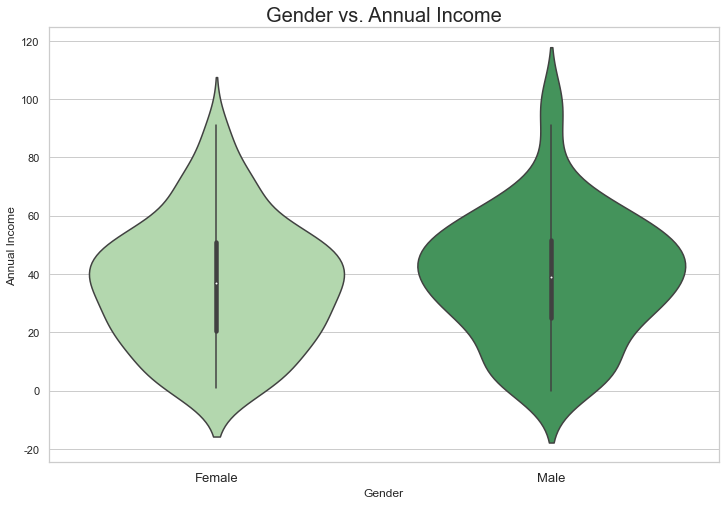

In [26]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(df['Gender'], df['Annual Income (k$)'], palette='Greens')
ax.set_xticklabels(['Female', 'Male'], size=13)
ax.set_ylabel('Annual Income')
ax.set_yticklabels(['0','-20', '0', '20', '40', '60', '80', '100', '120'])
plt.title('Gender vs. Annual Income', size=20)
plt.savefig('gender_income.png')

The interpretation for this graph is similar to interpretation of boxplot. In this case again the median for both gender lies at almost the same place but there are more Annual Income outliers for Male, which in general confirmed the theory that Male got higher income level than Female. 

**Gender vs. Age**

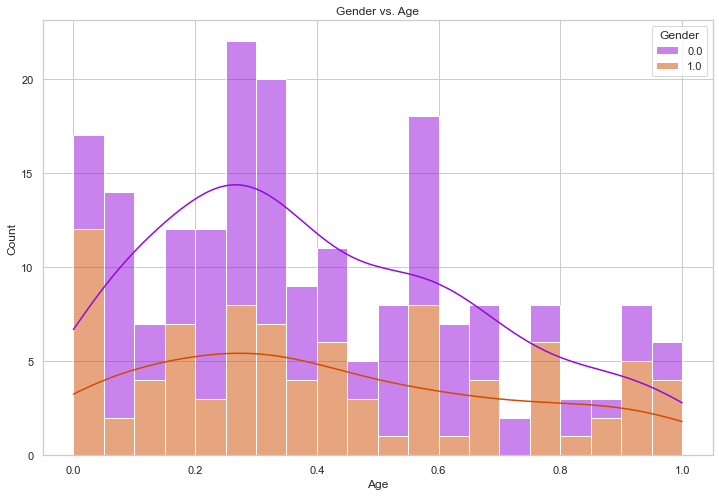

In [27]:
plt.figure(figsize=(12,8))
ax = sns.histplot(data=df, x='Age', hue='Gender', palette='gnuplot', bins=20, kde=True, multiple='stack')
plt.title('Gender vs. Age')
plt.savefig('gender_age.png')

# Clustering Analysis

Before I start perform machine learning analysis and run some algorithms I decided to drop column Gender, because first it won't bring many valueable information to my clustering method and secondly by doing this I tried to avoid biases in my analysis due to gender factor. 

In [28]:
df.drop('Gender', axis=1, inplace=True)
df.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,0.019231,0.000000,0.387755
1,0.057692,0.000000,0.816327
2,0.038462,0.008197,0.051020
3,0.096154,0.008197,0.775510
4,0.250000,0.016393,0.397959


## 1st scenario: cluster analysis of Spending Score and Annual Income

### K Means Clustering 

In [29]:
# setting X variable
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

First I want to check how many clusters are the most suitable for my data. To do this I will loop through 10 different cluster numbers on deafult K Means algorithms and check which one perform the best and `elbow method` allowed me to see it. 

In [30]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)

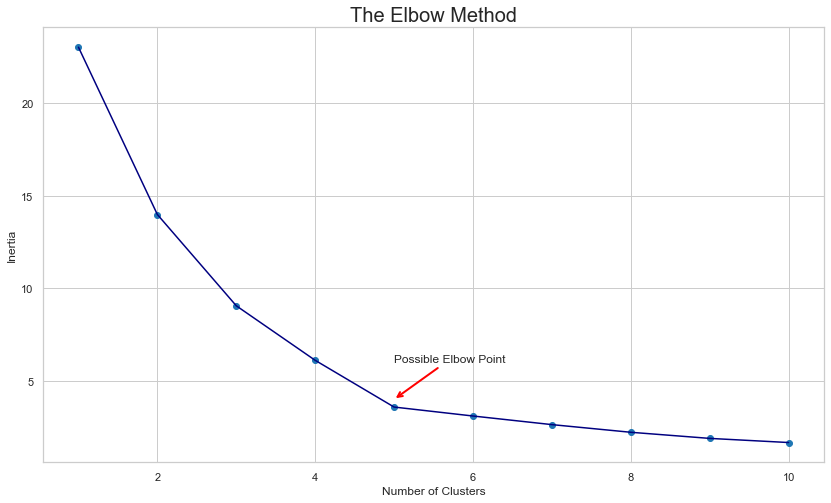

In [31]:
fig, ax = plt.subplots(figsize=(14, 8))
plt.plot(list_num_clusters,inertia, color='navy')
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method', fontsize=20)

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(5, 4), xytext=(5, 6), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))
plt.savefig('elbow1.png')

Now, I would like to create visual plot to show how different cluster numbers change in inertia. The line graph above that the optimal point may be either 3 or 5. Let's see both results in graph.

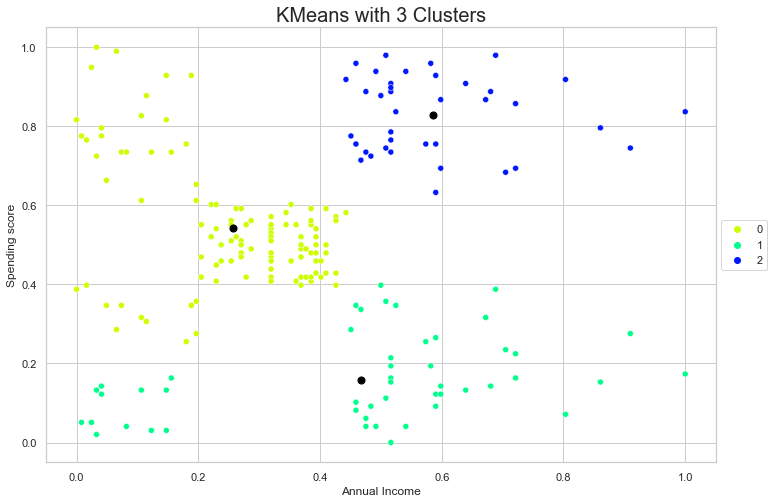

In [32]:
# 3 cluster
km3 = KMeans(n_clusters=3).fit(X)

X['Labels'] = km3.labels_
plt.figure(figsize=(12, 8))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('gist_rainbow', 3))
plt.scatter(km3.cluster_centers_[:, 0], km3.cluster_centers_[:, 1], s = 50, c = 'black')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('KMeans with 3 Clusters', fontsize=20)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('km3.png')

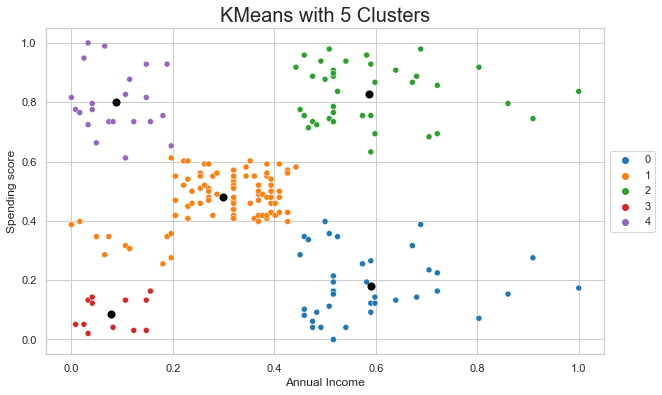

In [33]:
# 5 cluster
km5 = KMeans(n_clusters=5).fit(X)

X['Labels'] = km5.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('tab10', 5))
plt.scatter(km5.cluster_centers_[:, 0], km5.cluster_centers_[:, 1], s = 50, c = 'black')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('KMeans with 5 Clusters', fontsize=20)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('km5.png')

Based on those two graphs above I can concluded that KMeans with 5 clusters gave better insights about customers who visits our Mall. This segmentation with 5 clusters give me chance to more clearly identify customers segments:

* `Label 0:` mid income and mid spending score --> **`general`**<br>
* `Label 1:` high income and low spending score --> **`miser`**<br>
* `Label 2:` high income and high spending score --> **`target`**<br>
* `Label 3:` low income and high spending score --> **`spendthrift`**<br>
* `Label 4:` low income and low spending score --> **`careful`**<br>

### Hierarchical Clustering

As I already found the best number of clusters which is 5, I will perform the next clustering machine learning algorithms based on that knowledge.

I want to check how one of linkage method - `ward` will perform.<br><br>The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

* `ward` minimizes the variance of the clusters being merged
* `average` uses the average of the distances of each observation of the two sets
* `complete` or maximum linkage uses the maximum distances between all observations of the two sets
* `single` uses the minimum of the distances between all observations of the two sets


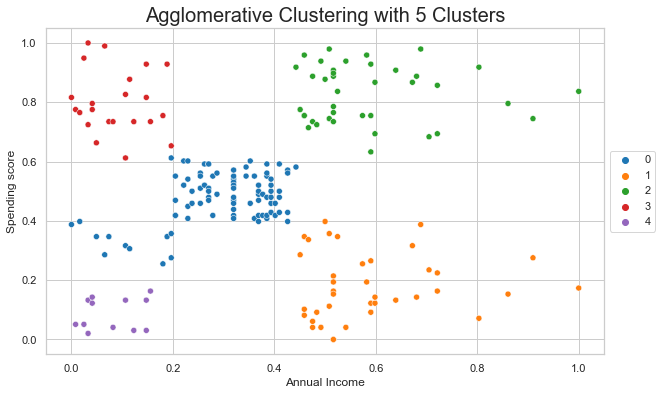

In [34]:
agglom = AgglomerativeClustering(n_clusters=5).fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('tab10', 5))
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('Agglomerative Clustering with 5 Clusters', fontsize=20)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('hierarchical_clus.png')

Both clustering algorithms: KMeans and Hierarchical Clustering did good job in labeling our customers into 5 different groups and both results are similar. 

And here is a plot of the dendrogram created from agglomerative clustering

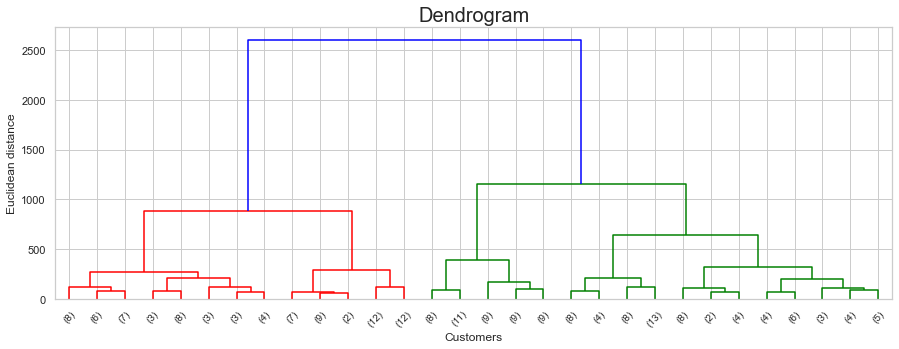

In [35]:
Z = hierarchy.linkage(agglom.children_, method='ward')

fig, ax = plt.subplots(figsize=(15,5))


hierarchy.set_link_color_palette(['red', 'green'])

den = hierarchy.dendrogram(Z, orientation='top', 
                           p=30, truncate_mode='lastp',
                            show_leaf_counts=True, ax=ax,
                           above_threshold_color='blue')
plt.xlabel('Customers')
plt.ylabel('Euclidean distance')
plt.title('Dendrogram', fontsize=20)
plt.savefig('dendrogram.png')

### DBSCAN 

Most of the traditional clustering techniques, such as k-means, hierarchical and fuzzy clustering, can be used to group data without supervision.
<br><br>
However, when applied to tasks with arbitrary shape clusters, or clusters within cluster, the traditional techniques might be unable to achieve good results. That is, elements in the same cluster might not share enough similarity or the performance may be poor. Additionally, Density-based Clustering locates regions of high density that are separated from one another by regions of low density. Density, in this context, is defined as the number of points within a specified radius.

DBSCAN stands for Density-Based Spatial Clustering of Applications with Noise. This technique is one of the most common clustering algorithms which works based on density of object. The whole idea is that if a particular point belongs to a cluster, it should be near to lots of other points in that cluster.

I will focus on two parameters:

* **epsilon:** the maximum distance between two samples for one to be considered as in the neighborhood of the other. This is not a maximum bound on the distances of points within a cluster. This is the most important DBSCAN parameter to choose appropriately for your data set and distance function
* **min_samples:** the number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself

In [36]:
# determine epsilon and min_samples values
epsilon = 10
min_samples = 5

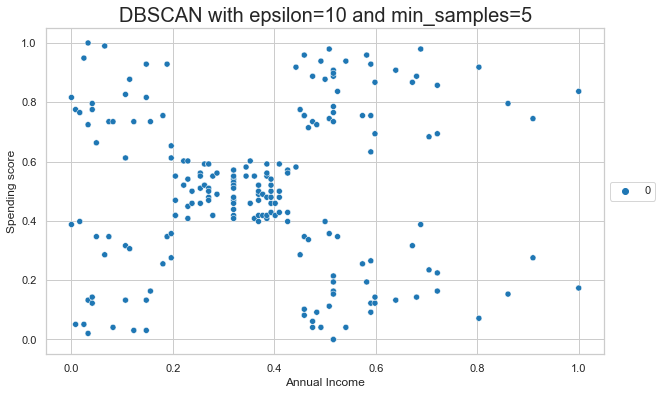

In [38]:
# DBSCAN
db = DBSCAN(eps=epsilon, min_samples=min_samples).fit(X)

X['Labels'] = db.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette='tab10')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('DBSCAN with epsilon=10 and min_samples=5', fontsize=20)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('dbscan.png')

No matter what value of epsilon or min_samples I took, the algorithm performed in similar way - all data was classified as one group. The reason why DBSCAN doesn't perform very well is a fact that density in our data isn't so strong. Probably, if the dataset will be bigger DBSCAN will donne better job. 

### Mean Shift

MeanShift clustering aims to discover blobs in a smooth density of samples. It is a centroid based algorithm, which works by updating candidates for centroids to be the mean of the points within a given region. These candidates are then filtered in a post-processing stage to eliminate near-duplicates to form the final set of centroids.
<br><br>
The algorithm automatically sets the number of clusters, instead of relying on a `parameter bandwidth`, which dictates the size of the region to search through. This parameter can be set manually, but can be estimated using the provided estimate_bandwidth function.

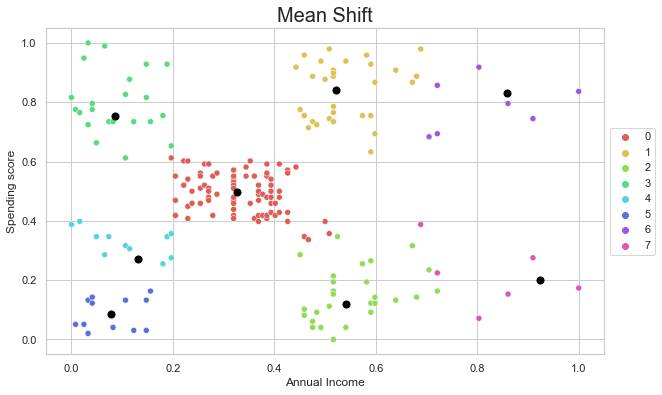

In [39]:
# the following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.1)

# MeanShift 
ms = MeanShift(bandwidth).fit(X)

X['Labels'] = ms.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('hls', np.unique(ms.labels_).shape[0]))
plt.scatter(ms.cluster_centers_[:, 0], ms.cluster_centers_[:, 1], s = 50, c = 'black')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('Mean Shift', fontsize=20)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('mean_shift.png')

## 2nd scenario: cluster analysis of Spending Score and Age

### K Means Clustering

In [40]:
# setting X variable
X = df[['Age', 'Spending Score (1-100)']]

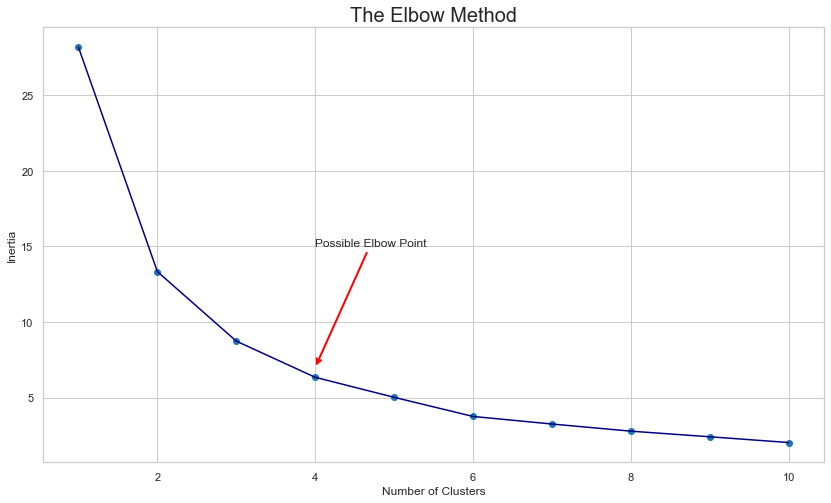

In [41]:
# elbow method
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X)
    inertia.append(km.inertia_)
    
fig, ax = plt.subplots(figsize=(14, 8))
plt.plot(list_num_clusters,inertia, color='navy')
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('The Elbow Method', fontsize=20)

# Annotate arrow
ax.annotate('Possible Elbow Point', xy=(4, 7), xytext=(4, 15), xycoords='data',          
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='red', lw=2))
plt.savefig('elbow2.png')

For this scenario, where I am doing clustering for different customers age and their spending score, the value of 4 clusters seems to be reasonable choice.

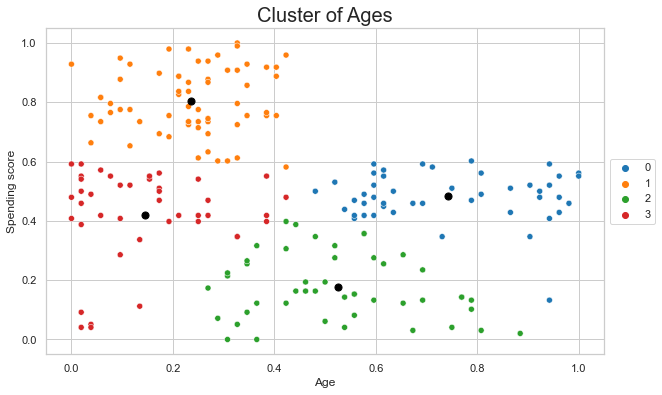

In [42]:
# 4 cluster in 2nd scenario
km4 = KMeans(n_clusters=4).fit(X)

X['Labels'] = km4.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(X['Age'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('tab10', 4))
plt.scatter(km4.cluster_centers_[:, 0], km4.cluster_centers_[:, 1], s = 50, c = 'black')
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.title('Cluster of Ages', fontsize=20)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('km4.png')

The graph above: `Cluster of Ages` gave me clear insight how customers can be segmented based on their age and spending score. As we can see there are 4 different group: 

* `Label 0:` low age and mid spending score --> `Young Customers`
* `Label 1:` high age and mid spending score --> `Senior Citizen Customers`
* `Label 2:` mid age and low spending score --> `Usual Customers`
* `Label 3:` low age and high spending score --> `Priority Customers`

### Hierarchical Clustering

As I did before, in this scenario I will also perform default linkage method `ward` for this algorithm. I will also set number of clusters equal to 4 as I previously found out that this number could be the more optimal value for dataset I work on right now. 

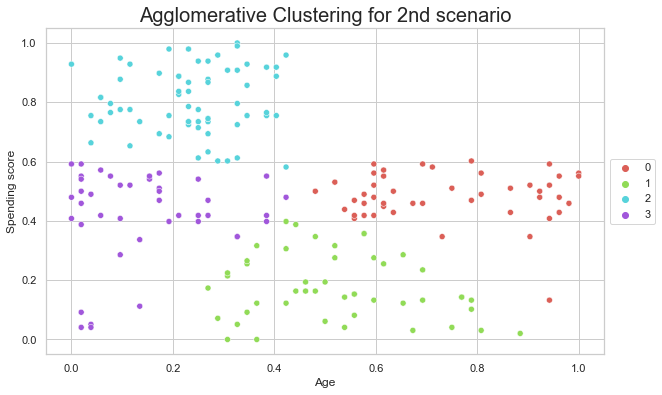

In [43]:
agglom = AgglomerativeClustering(n_clusters=4).fit(X)

X['Labels'] = agglom.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(X['Age'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('hls', 4))
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.title('Agglomerative Clustering for 2nd scenario', fontsize=20)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)
plt.savefig('hiererchy_clus2.png')

## All in one place

I would like to visualize the results of different clustering algorithms I performed for two different business scenario I had.

**Scenario I**

In [44]:
# setting X variable
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

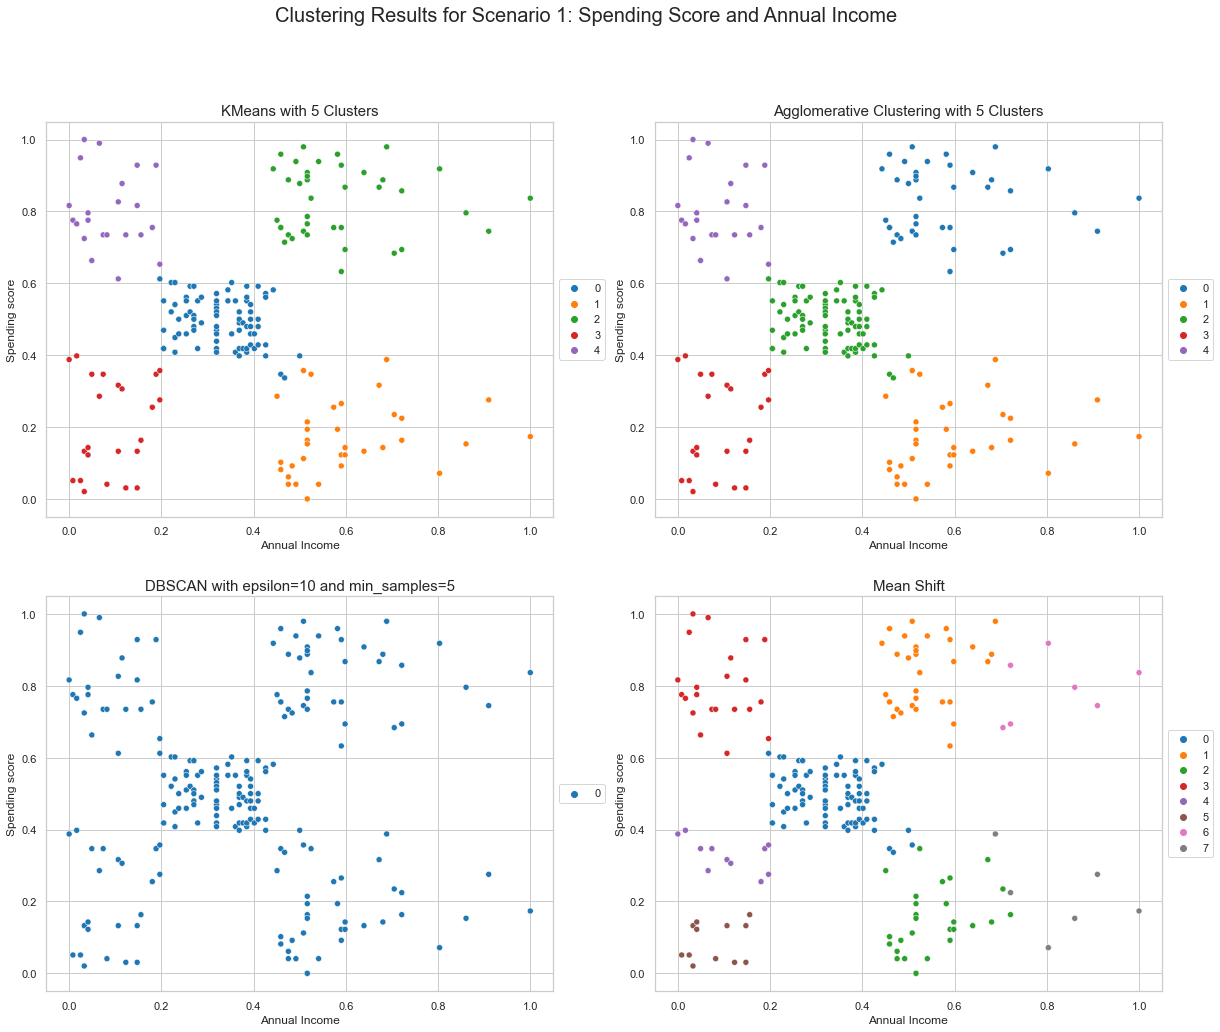

In [45]:
plt.figure(figsize=(20,16))
plt.suptitle('Clustering Results for Scenario 1: Spending Score and Annual Income', fontsize=20)

plt.subplot(221)
km5 = KMeans(n_clusters=5).fit(X)
X['Labels'] = km5.labels_
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('tab10', 5))
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('KMeans with 5 Clusters', fontsize=15)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)


plt.subplot(222)
agglom = AgglomerativeClustering(n_clusters=5).fit(X)
X['Labels'] = agglom.labels_
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('tab10', 5))
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('Agglomerative Clustering with 5 Clusters', fontsize=15)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)


plt.subplot(223)
db = DBSCAN(eps=10, min_samples=5).fit(X)
X['Labels'] = db.labels_
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette='tab10')
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('DBSCAN with epsilon=10 and min_samples=5', fontsize=15)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)


plt.subplot(224)
bandwidth = estimate_bandwidth(X, quantile=0.1)
ms = MeanShift(bandwidth).fit(X)
X['Labels'] = ms.labels_
sns.scatterplot(X['Annual Income (k$)'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('tab10', np.unique(ms.labels_).shape[0]))
plt.xlabel('Annual Income')
plt.ylabel('Spending score')
plt.title('Mean Shift', fontsize=15)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)

plt.savefig('scenario1.png')

**Scenario II**

In [46]:
# setting X variable
X = df[['Age', 'Spending Score (1-100)']]

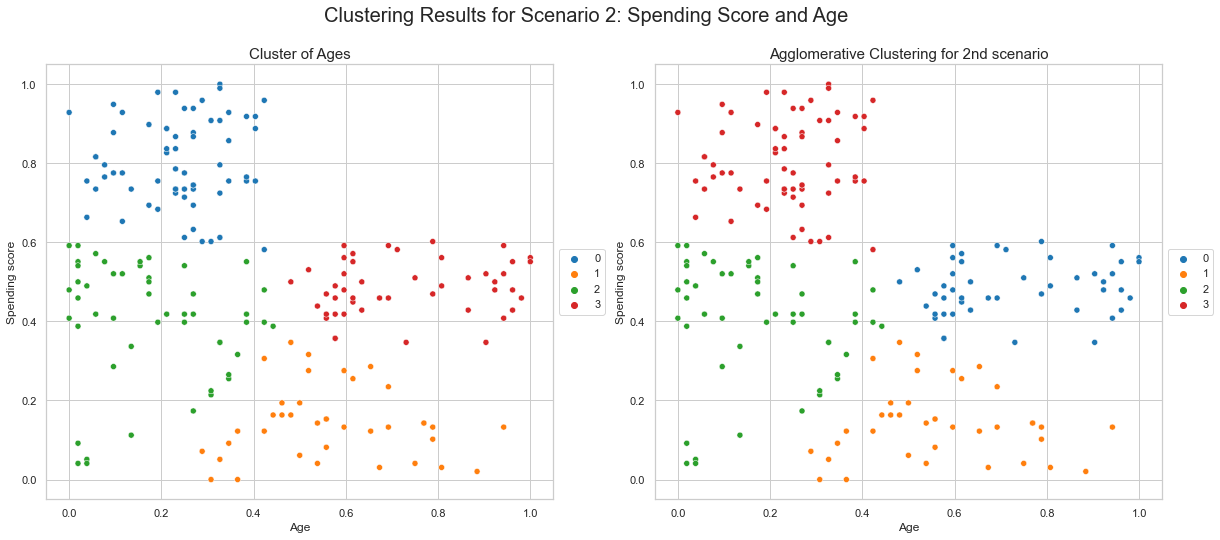

In [47]:
plt.figure(figsize=(20,8))
plt.suptitle('Clustering Results for Scenario 2: Spending Score and Age', fontsize=20)

plt.subplot(121)
km4 = KMeans(n_clusters=4).fit(X)
X['Labels'] = km4.labels_
sns.scatterplot(X['Age'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('tab10', 4))
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.title('Cluster of Ages', fontsize=15)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)


plt.subplot(122)
agglom = AgglomerativeClustering(n_clusters=4).fit(X)
X['Labels'] = agglom.labels_
sns.scatterplot(X['Age'], X['Spending Score (1-100)'], hue=X['Labels'], 
                palette=sns.color_palette('tab10', 4))
plt.xlabel('Age')
plt.ylabel('Spending score')
plt.title('Agglomerative Clustering for 2nd scenario', fontsize=15)
plt.legend(loc=6, bbox_to_anchor=(1, 0.5), ncol=1)

plt.savefig('scenario2.png')

# Limitations

What is really important to mention is a fact, that this dataset from Kaggle was really small one. Because of it DBSCAN couldn't perform well.<br><br>Once the dataset will be updated, the algorithms could be review.<br><br>The goal for this notebook and for tasks was to perform some basic clustering methods and was done pretty good but still models could be further improved and parameters could be tuned to perform even better. 